## &emsp;&emsp;&emsp;&emsp;&emsp;Team05 : PC component Price Analysis

1. PHUONG BUNTHOEUN
2. MEN CHANCHHORPORN
3. LEAT SEANGLONG
4. MEACH SEAKLAV 
5. NGEAV BONAT
6. LIM SUNHENG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading data csv

In [2]:
df = pd.read_csv('DataPCS3.csv')
df.head()

,ID,Category,Location,Posted,Brand,Discription,Price,RAM,CPU,VGA,Price1
0,4235811,Parts & Accessories,Battambang,6-May-23,PC Components,Used,20.0,32GB,Intel Core i9,4GB,1500.0
1,5005760,Parts & Accessories,Phnom Penh,6-May-23,PC Components,Used,200.0,8GB,Intel Core i5,Integrated,350.0
2,8541741,Parts & Accessories,Phnom Penh,6-May-23,PC Components,Used,40.0,8GB,Intel Core i5,2GB & Under,360.0
3,3733350,Parts & Accessories,Banteay Meanchey,6-May-23,PC Components,Used,140.0,8GB,Intel Core i7,4GB,440.0
4,8035739,Parts & Accessories,Phnom Penh,6-May-23,PC Components,Used,7.0,8GB,Intel Core i5,2GB & Under,388.0


##  Information Dataset

In [3]:
#Feature categorical
features_cat=[col for col in df.columns if df[col].dtypes =='object']
print('category feature :',features_cat)

#Features numerical
features_num = [col for col in df.columns if df[col].dtypes != 'object']
print('numerical features:' ,features_num)

category feature : ['Category', 'Location', 'Posted', 'Brand', 'Discription', 'RAM', 'CPU', 'VGA']
numerical features: ['ID', 'Price', 'Price1']


In [4]:
df.rename(columns = {'Price1':'TotalPrice'}, inplace = True)

## Describe Statitical

In [5]:
df.describe()

,ID,Price,TotalPrice
count,1.055000e+03,1055.000000,1054.000000
mean,5.592710e+06,139.117156,461.400380
std,2.663973e+06,375.903279,280.977062
min,1.011550e+06,2.100000,100.000000
25%,3.199013e+06,10.500000,295.000000
50%,5.621769e+06,35.000000,380.000000
75%,7.952290e+06,80.000000,508.250000
max,9.994548e+06,2500.000000,1750.000000


In [6]:
# Check values of Proccessor in the dataset
df['CPU'].value_counts()

Intel Core i5    703
Intel Core i7    279
Intel Core i9     70
Intel Core i3      1
Intel Celeron      1
Other              1
Name: CPU, dtype: int64

In [7]:
### Check values of VGA in the dataset
df['VGA'].value_counts()

4GB            973
2GB & Under     77
Integrated       5
Name: VGA, dtype: int64

In [8]:
### Check values of RAM in the dataset
df['RAM'].value_counts()

8GB     497
4GB     417
32GB     70
16GB     69
6GB       1
12GB      1
Name: RAM, dtype: int64

## Understanding the data

### Drop unwanted columns

In [9]:
df.drop(columns = ['ID','Posted','Price','Category','Location','Brand'],axis=1, inplace = True)

In [10]:
df.shape

(1055, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Discription  1055 non-null   object 
 1   RAM          1055 non-null   object 
 2   CPU          1055 non-null   object 
 3   VGA          1055 non-null   object 
 4   TotalPrice   1054 non-null   float64
dtypes: float64(1), object(4)
memory usage: 41.3+ KB


In [12]:
df['RAM'] = df['RAM'].str.replace('GB','')
df['RAM'] = df['RAM'].astype('int64')

In [13]:
def fetch_procesor(text):
    if text == 'Intel Core i5':
        return 6
    elif text == 'Intel Core i7':
        return 8
    elif text == 'Intel Core i3':
        return 4
    elif text == 'Intel Celeron':
        return 2
    elif text == 'Intel Core i9':
        return 14
    else :
        return 0        
df['N_CPU'] = df['CPU'].apply(fetch_procesor)

In [14]:
df.nunique()

Discription      2
RAM              6
CPU              6
VGA              3
TotalPrice     378
N_CPU            6
dtype: int64

In [15]:
df.describe(include = ['float64', 'int64'])

,RAM,TotalPrice,N_CPU
count,1055.000000,1054.000000,1055.000000
mean,8.536493,461.400380,7.048341
std,6.964558,280.977062,2.064550
min,4.000000,100.000000,0.000000
25%,4.000000,295.000000,6.000000
50%,8.000000,380.000000,6.000000
75%,8.000000,508.250000,8.000000
max,32.000000,1750.000000,14.000000


In [16]:
df.describe(include = ['object'])

,Discription,CPU,VGA
count,1055,1055,1055
unique,2,6,3
top,Used,Intel Core i5,4GB
freq,614,703,973


## Missing Value

In [17]:
df.isnull().sum()

Discription    0
RAM            0
CPU            0
VGA            0
TotalPrice     1
N_CPU          0
dtype: int64

In [18]:
df.dropna(inplace=True)

## Dubplicated

In [19]:
df.duplicated().sum()

485

In [24]:
# df[df.duplicated]

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(569, 6)

## Outlier

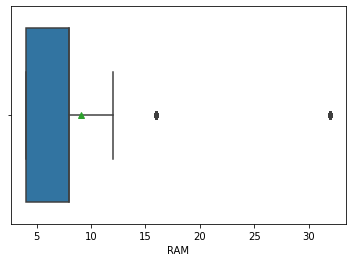

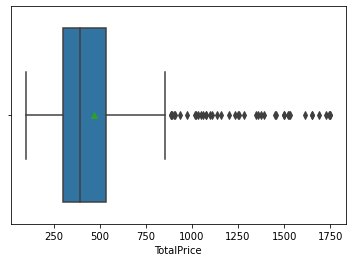

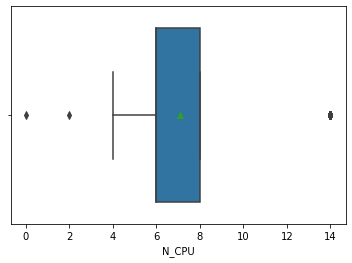

In [27]:
def plot_boxplot(data, feature):
    sns.boxplot(x = data[feature], showmeans = True, data = df)
    plt.show()

for feature in df.select_dtypes(include = ['float64','int64']):
    plot_boxplot(df, feature)

In [28]:
def detect_outlier(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [29]:
detect_outlier(df['TotalPrice']).index

Int64Index([   0,   26,   41,   56,   71,   86,  116,  131,  176,  191,  208,
             251,  311,  326,  341,  343,  356,  386,  446,  506,  551,  596,
             701,  716,  731,  746,  761,  767,  776,  791,  806,  821,  844,
             881,  896,  911,  926,  941,  956,  971,  986, 1016],
           dtype='int64')

## Data Exploration

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\KIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalPrice', ylabel='Density'>

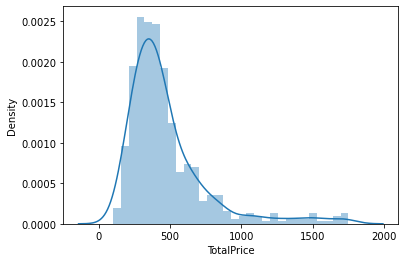

In [31]:
sns.distplot(df['TotalPrice'])

<AxesSubplot:>

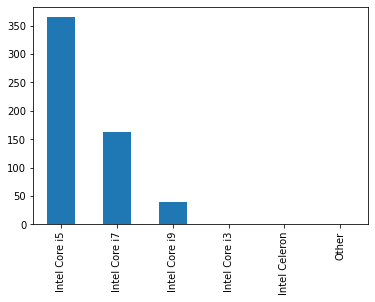

In [32]:
df['CPU'].value_counts().plot(kind='bar')

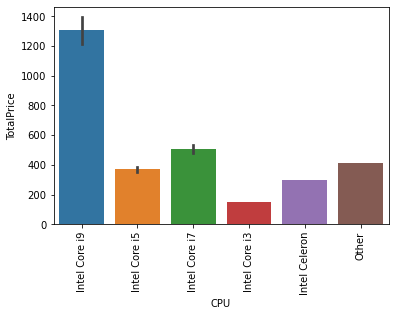

In [33]:
sns.barplot(x=df['CPU'],y=df['TotalPrice'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

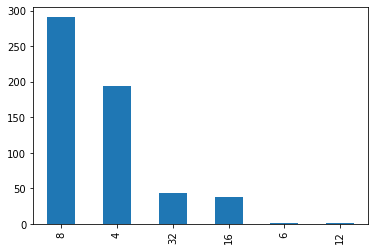

In [34]:
df['RAM'].value_counts().plot(kind='bar')

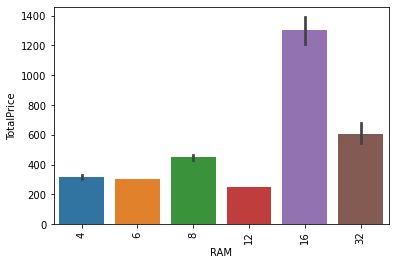

In [35]:
sns.barplot(x=df['RAM'],y=df['TotalPrice'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

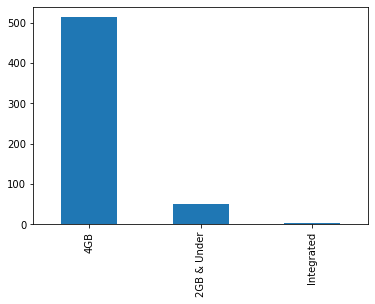

In [36]:
df['VGA'].value_counts().plot(kind='bar')

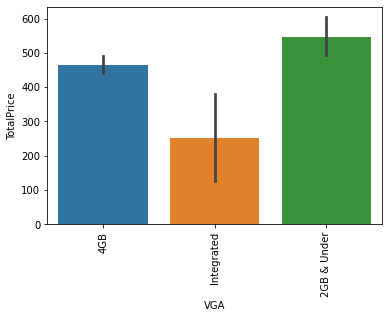

In [37]:
sns.barplot(x=df['VGA'],y=df['TotalPrice'])
plt.xticks(rotation='vertical')
plt.show()

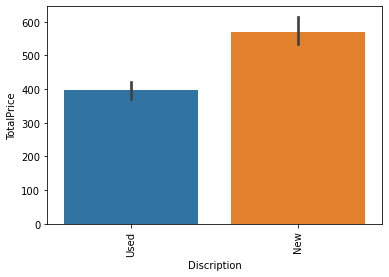

In [38]:
sns.barplot(x=df['Discription'],y=df['TotalPrice'])
plt.xticks(rotation='vertical')
plt.show()

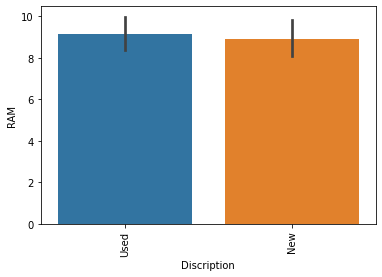

In [39]:
sns.barplot(x=df['Discription'],y=df['RAM'])
plt.xticks(rotation='vertical')
plt.show()

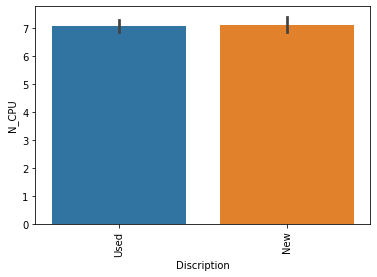

In [40]:
sns.barplot(x=df['Discription'],y=df['N_CPU'])
plt.xticks(rotation='vertical')
plt.show()

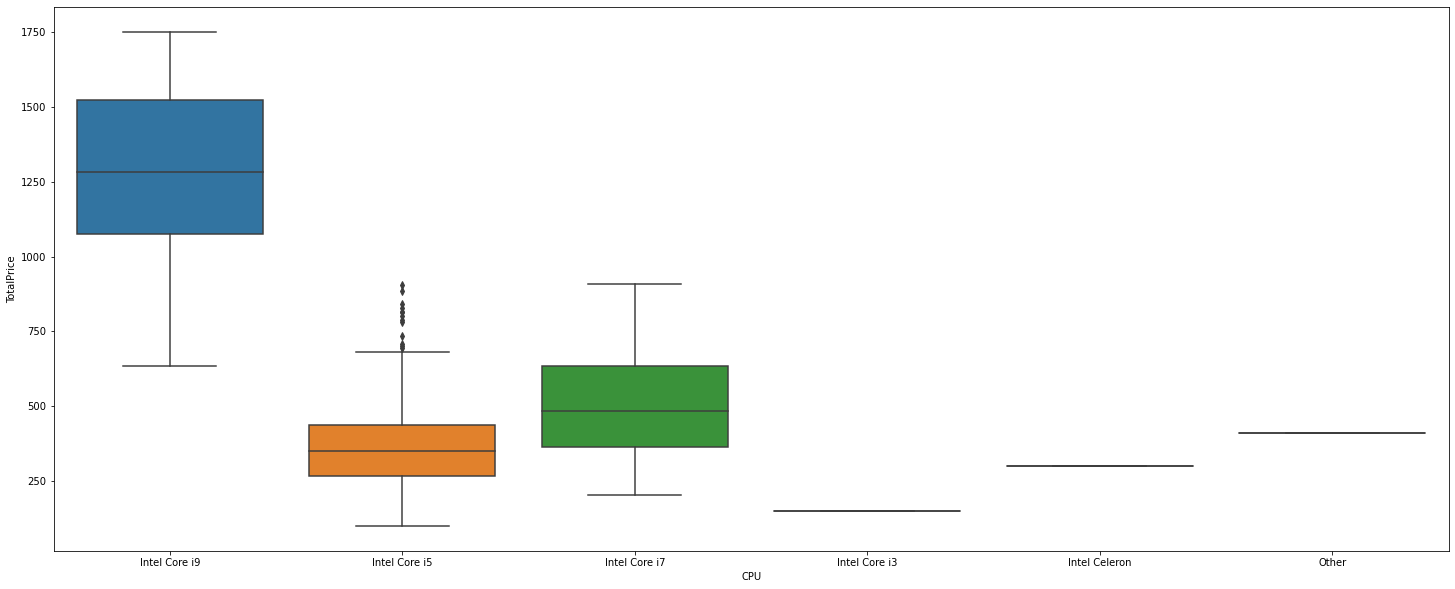

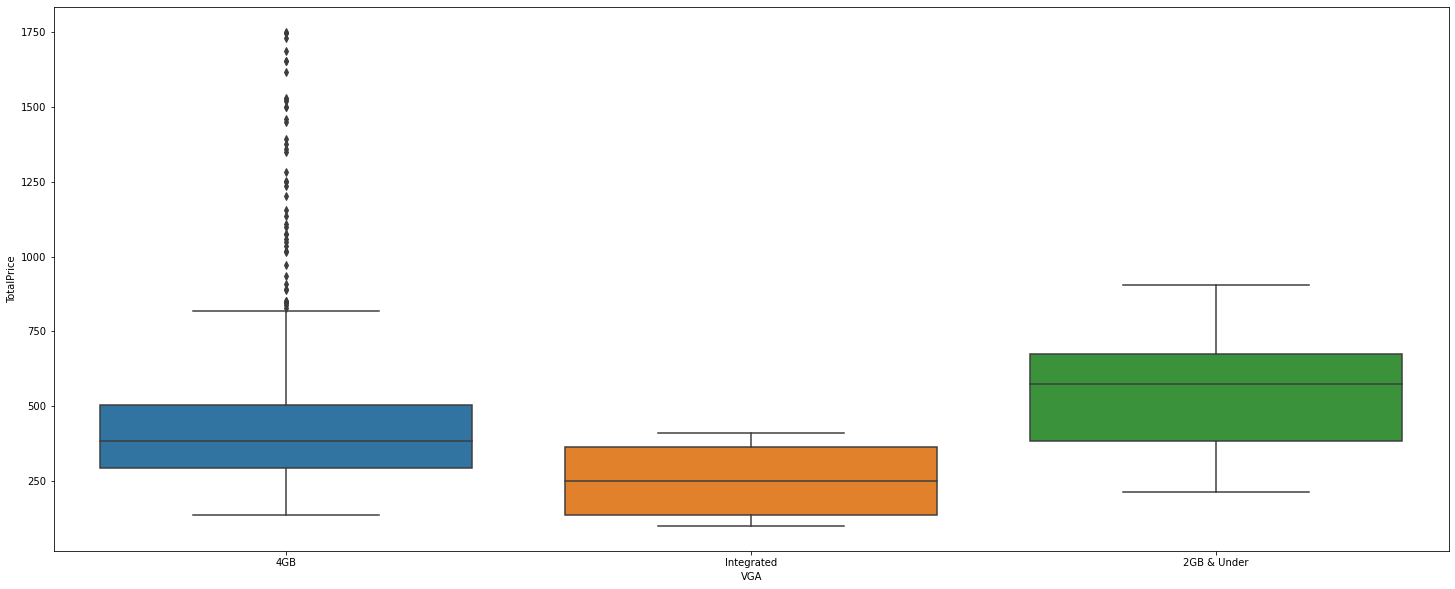

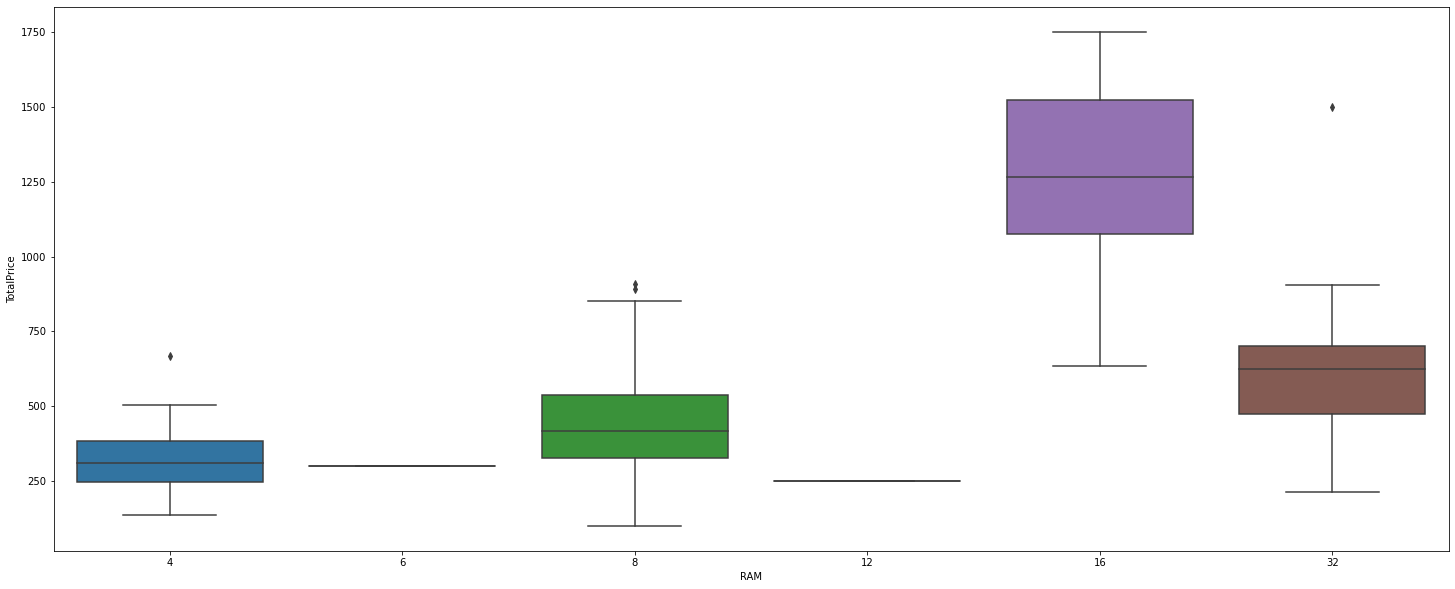

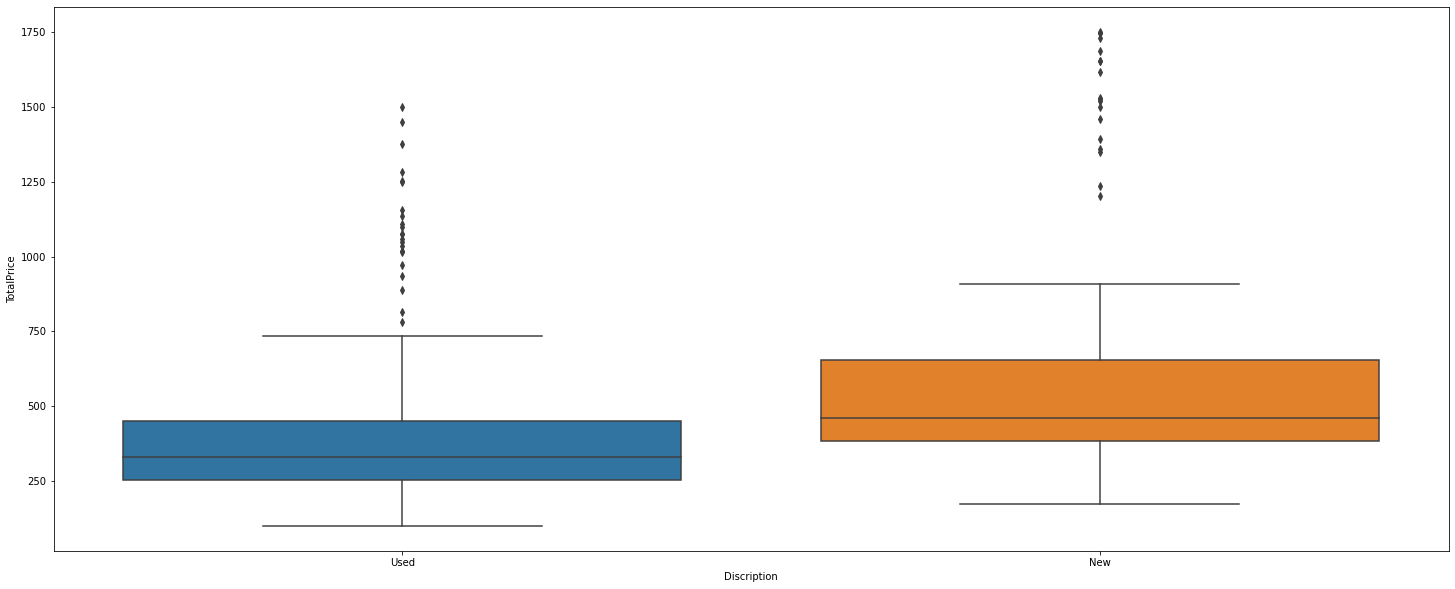

In [41]:
for feature in ['CPU', 'VGA', 'RAM', 'Discription']:
    plt.figure(figsize = (25, 10))
    sns.boxplot(x = feature, y = 'TotalPrice', data = df)
    plt.show()

Text(0, 0.5, 'TotalPrice (USD)')

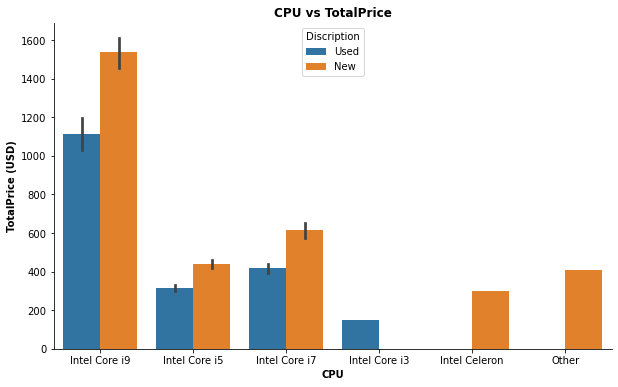

In [42]:
plt.figure(figsize=(10,6))
plt.title('CPU vs TotalPrice', fontweight='bold')
sns.barplot(x='CPU', y='TotalPrice', hue='Discription', data=df)
sns.despine(top=True, right=True)
plt.xlabel('CPU', fontweight='bold')
plt.ylabel('TotalPrice (USD)', fontweight='bold')

Text(0, 0.5, 'TotalPrice (USD)')

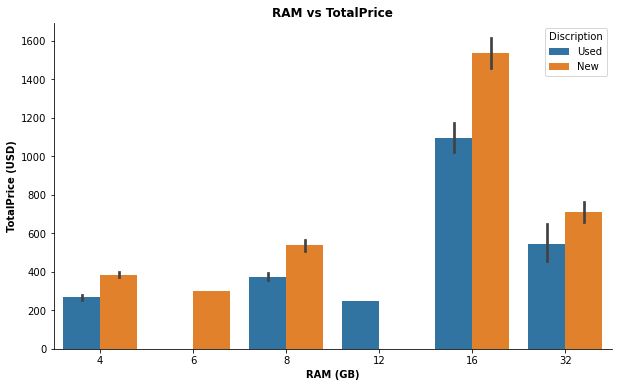

In [43]:
plt.figure(figsize=(10,6))
plt.title('RAM vs TotalPrice', fontweight='bold')
sns.barplot(x='RAM', y='TotalPrice', hue='Discription', data=df)
sns.despine(top=True, right=True)
plt.xlabel('RAM (GB)', fontweight='bold')
plt.ylabel('TotalPrice (USD)', fontweight='bold')

Text(0, 0.5, 'TotalPrice (USD)')

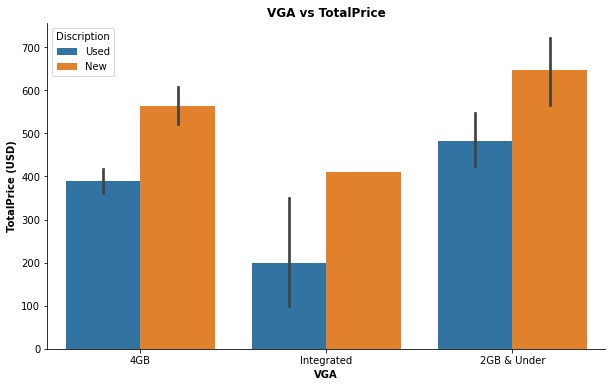

In [44]:
plt.figure(figsize=(10,6))
plt.title('VGA vs TotalPrice', fontweight='bold')
sns.barplot(x='VGA', y='TotalPrice', hue='Discription', data=df)
sns.despine(top=True, right=True)
plt.xlabel('VGA', fontweight='bold')
plt.ylabel('TotalPrice (USD)', fontweight='bold')

## Feature Engineering

In [45]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the categorical column into numerical labels
df['N_Discription'] = le.fit_transform(df['Discription'])
df['N_VGA'] = le.fit_transform(df['VGA'])

In [46]:
df1 = df[['TotalPrice', 'RAM', 'N_CPU', 'N_Discription', 'N_VGA']].copy()
X = df1.drop(['TotalPrice'], axis = 1)
y = df1['TotalPrice']

### Feature Importance using f_regression & ExtraTreesRegressor & SelectKBest

In [47]:
from sklearn.feature_selection import f_regression

def feature_importance(X, y):
    features = list(X.columns)
    importance_scores = f_regression(X[features], y)
    importance_df = pd.DataFrame({'Feature': features, 'Importance Score': importance_scores[0]})
    importance_df = importance_df.sort_values('Importance Score', ascending = False)

    return importance_df

In [48]:
important_features = feature_importance(X, y)
important_features

,Feature,Importance Score
1,N_CPU,1008.364786
0,RAM,132.602823
2,N_Discription,57.376478
3,N_VGA,5.411309


In [49]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(f_regression, k=3)

selector.fit(X, y)
selected_features = selector.get_support()
data_selected = X[X.columns[selected_features]]
for feature in data_selected.columns:
    print(feature)

RAM
N_CPU
N_Discription


In [50]:
df1.head()

,TotalPrice,RAM,N_CPU,N_Discription,N_VGA
0,1500.0,32,14,1,1
1,350.0,8,6,1,2
2,360.0,8,6,1,0
3,440.0,8,8,1,1
4,388.0,8,6,1,0


## Data Visualization

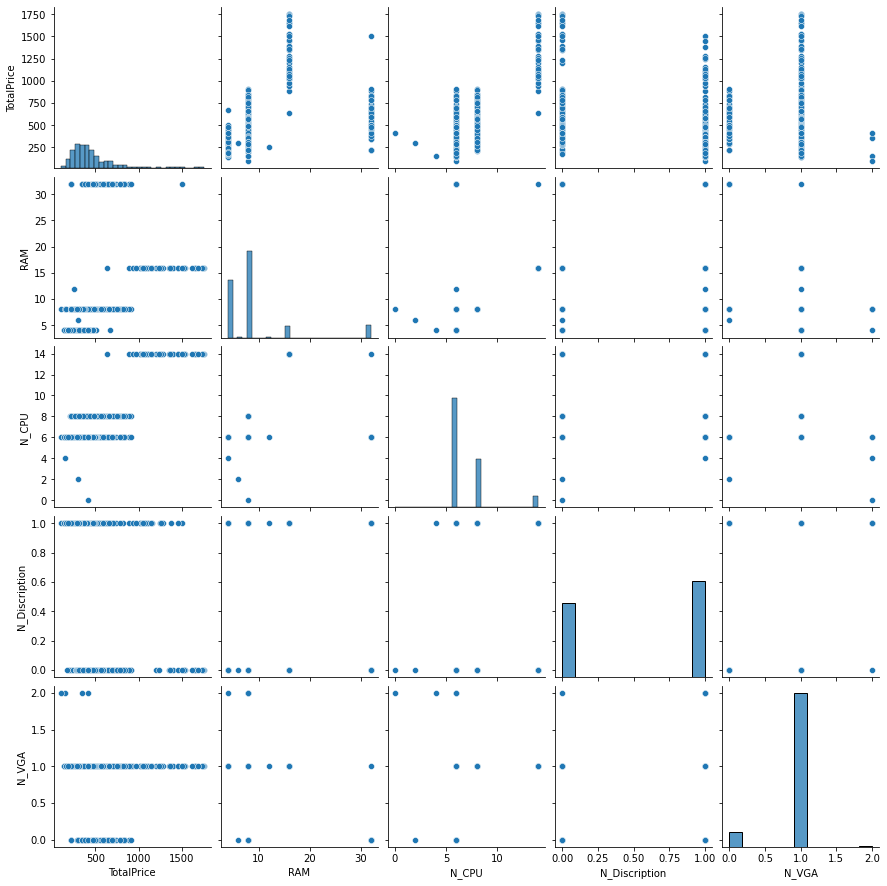

In [51]:
sns.pairplot(df1)

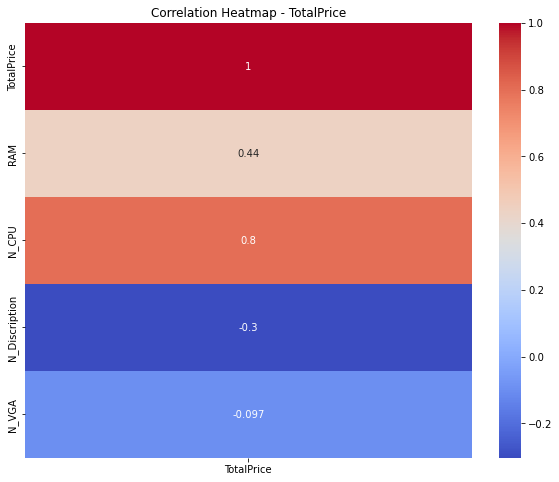

In [52]:
correlation = df1.corr()['TotalPrice']
plt.figure(figsize=(10, 8))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - TotalPrice')
plt.show()


C:\Users\KIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalPrice', ylabel='Density'>

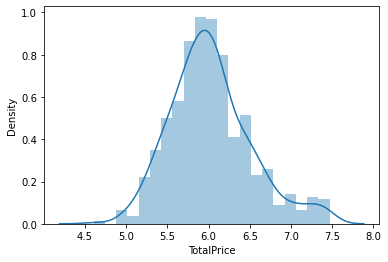

In [53]:
sns.distplot(np.log(df['TotalPrice']))

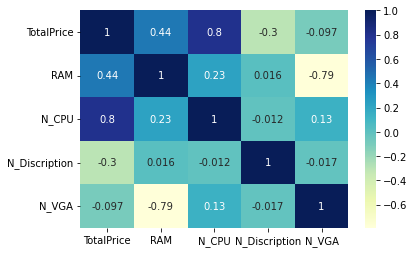

In [77]:
sns.heatmap(df1.corr(),cmap = 'YlGnBu', annot = True);

In [78]:
df1.describe()

,TotalPrice,RAM,N_CPU,N_Discription,N_VGA
count,569.000000,569.000000,569.000000,569.000000,569.000000
mean,471.639719,9.029877,7.096661,0.565905,0.917399
std,285.977472,7.303348,2.104524,0.496074,0.299993
min,100.000000,4.000000,0.000000,0.000000,0.000000
25%,300.000000,4.000000,6.000000,0.000000,1.000000
50%,395.000000,8.000000,6.000000,1.000000,1.000000
75%,533.000000,8.000000,8.000000,1.000000,1.000000
max,1750.000000,32.000000,14.000000,1.000000,2.000000


### Create model:

In [56]:
X = df1.drop(columns=['TotalPrice','N_VGA'])
y = np.log(df1['TotalPrice'])

## Model

### Build Model

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)


In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [59]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [60]:
# Create a scatter plot
def predict_scatter(model, y_pred, y_test):
    plt.scatter(y_test, y_pred)
    diagonal_line = np.linspace(min(y_test), max(y_test), 100)
    plt.plot(diagonal_line, diagonal_line, color='r', linestyle='--', label='Diagonal Line')
    # Add labels and title to the plot
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot of Actual vs Predicted Values')
    # Show the plot
    plt.show()

In [61]:

def residuals_plot(model, y_pred, y_test):
    # Residuals (difference between predicted and actual values)
    residuals = y_test - y_pred

    # Plotting residuals
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

    # Histogram of residuals
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')
    plt.show()

In [62]:
def plot_learning_curves(estimator,
                         X_train,
                         y_train,
                         train_sizes = [1, 100, 500, 1000, 1500, 1994],
                         cv = 5):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)

    # Calculate mean and standard deviation for train and validation scores
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, val_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Score')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15, color='green')

    # Add labels and title
    plt.xlabel('Training Set Size')
    plt.ylabel('MSE')
    plt.title('Learning Curves')
    plt.legend(loc='best')

    # Set plot limits
    plt.ylim([0.0, max(train_mean.max(), val_mean.max()) + 0.1])

    # Display the plot
    plt.show()

In [63]:
from sklearn.model_selection import cross_val_score, KFold
def Evaluate_the_model(model, y_pred, y_test):
    # Perform cross-validation
    num_folds = 5  # Number of folds for cross-validation
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Evaluate the model using cross-validation
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert negative MSE scores to positive

    # Print the evaluation results
    print("Cross-Validation MSE scores:", mse_scores)
    print("Mean MSE:", np.mean(mse_scores))
    print("Standard Deviation of MSE:", np.std(mse_scores))
    # Plot the cross-validation results
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_folds + 1), mse_scores, marker='o', linestyle='-', color='b')
    plt.xlabel('Fold')
    plt.ylabel('MSE')
    plt.title('Cross-Validation Results')
    plt.grid(True)
    plt.show()

### Multiple LinearRegression

In [75]:
import statsmodels.api as sm

x = sm.add_constant(X_train)
results = sm.OLS(y_train, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TotalPrice   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     370.1
Date:                Sat, 15 Jul 2023   Prob (F-statistic):          2.56e-124
Time:                        22:54:01   Log-Likelihood:                -56.576
No. Observations:                 483   AIC:                             121.2
Df Residuals:                     479   BIC:                             137.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.0440      0.045    111.028      0.000       4.955       5.133
RAM               0.0217      0.002     12.237      0.000       0.018       0.025
N_CPU             0.1397      0.006     23.417      0.000       0.128       0.151
N_Discription    -0.3733      0.025    -14.877      0.000      -0.423      -0.324
==============================================================================
Omnibus:                       24.585   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.922
Skew:                          -0.447   Prob(JB):                     1.17e-07
Kurtosis:                       3.886   Cond. No.                         49.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R2 score 0.6941456750648598
MSE 0.0683585932392593
MAE 0.21307632554362313


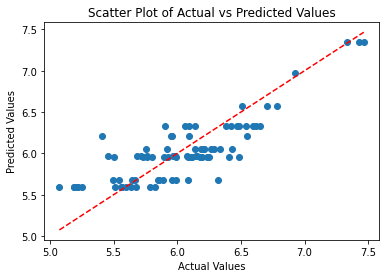

None


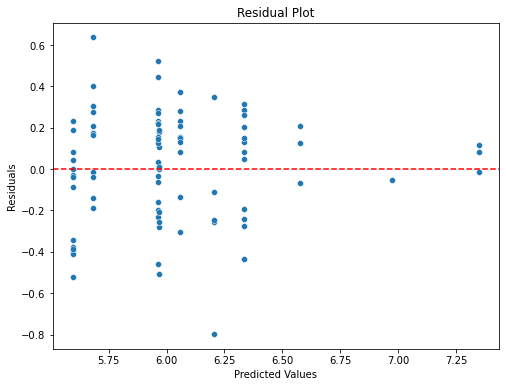

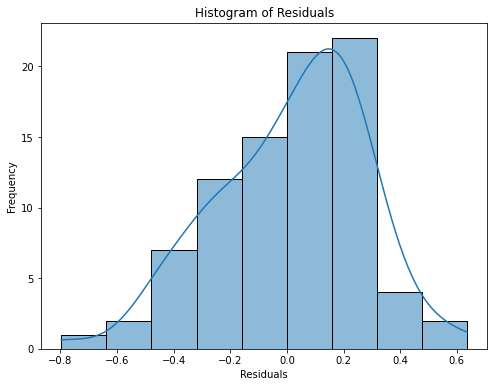

None
Cross-Validation MSE scores: [0.07052955 0.0974308  0.06590229 0.06295691 0.07577377]
Mean MSE: 0.07451866185564246
Standard Deviation of MSE: 0.012250471154638688


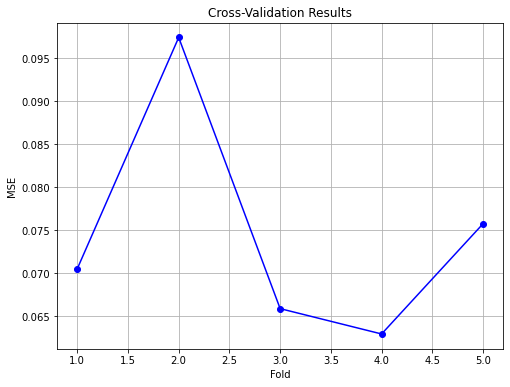

None


In [76]:
step1 = LinearRegression()

step1.fit(X_train,y_train)

y_pred = step1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print(predict_scatter(step1, y_pred, y_test))
print(residuals_plot(step1, y_pred, y_test))
print(Evaluate_the_model(step1, y_pred, y_test))

### Ridge regression

R2 score 0.6911118921256407
MSE 0.06903664523006328
MAE 0.21623357186850206


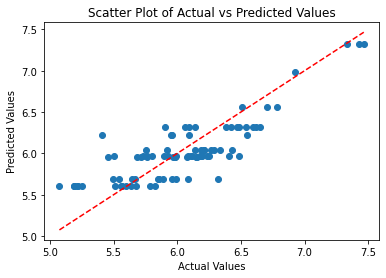

None


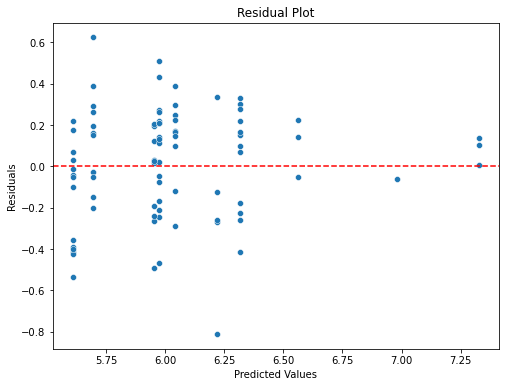

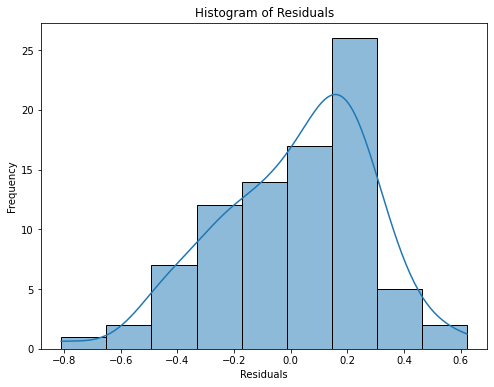

None
Cross-Validation MSE scores: [0.07116419 0.09515668 0.06559853 0.06435854 0.07717826]
Mean MSE: 0.07469123826139626
Standard Deviation of MSE: 0.011197336392196574


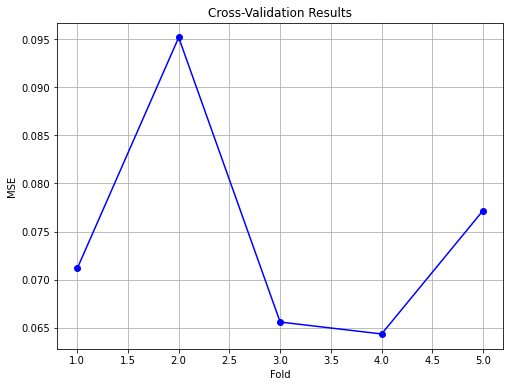

None


In [66]:
step2 = Ridge(alpha=10)

step2.fit(X_train,y_train)

y_pred = step2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print(predict_scatter(step2, y_pred, y_test))
print(residuals_plot(step2, y_pred, y_test))
print(Evaluate_the_model(step2, y_pred, y_test))

### Lasso regression

R2 score 0.6937996430889991
MSE 0.06843593155739705
MAE 0.2134947453414031


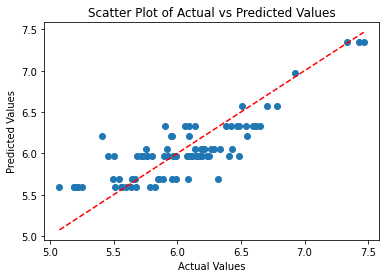

None


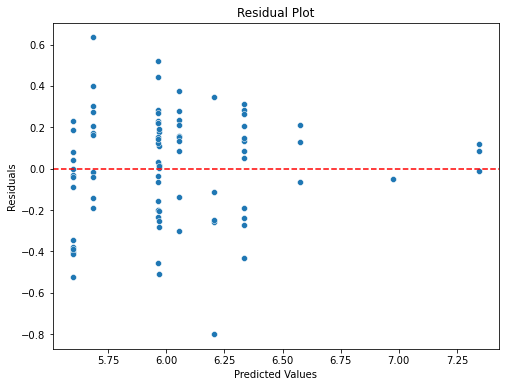

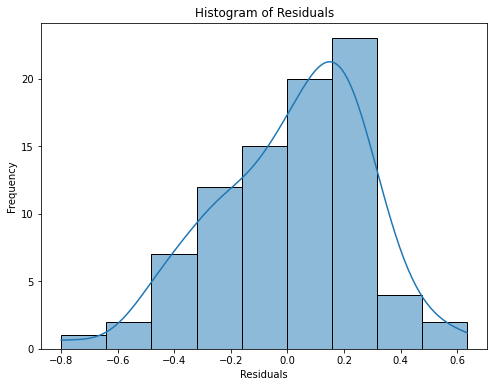

None
Cross-Validation MSE scores: [0.07058368 0.097151   0.06585225 0.06312834 0.07591226]
Mean MSE: 0.07452550411288718
Standard Deviation of MSE: 0.012120187815800976


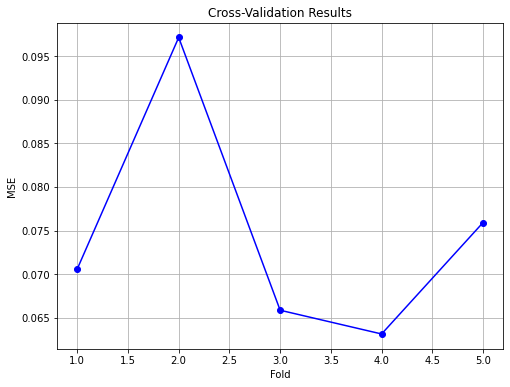

None


In [67]:
step3 = Lasso(alpha=0.001)

step3.fit(X_train,y_train)

y_pred = step3.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print(predict_scatter(step3, y_pred, y_test))
print(residuals_plot(step3, y_pred, y_test))
print(Evaluate_the_model(step3, y_pred, y_test))

### Decision Tree

R2 score 0.7038093486507847
MSE 0.06619875740238729
MAE 0.2109959689709734


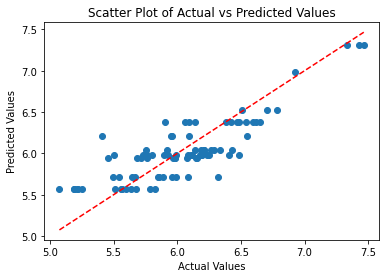

None


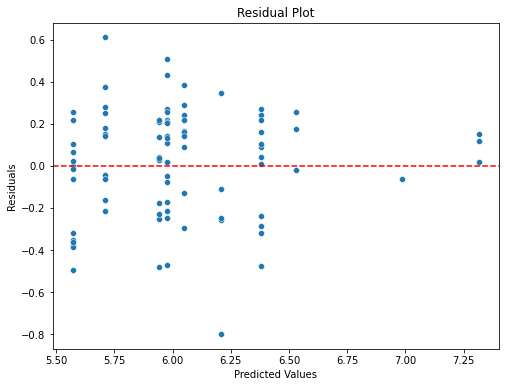

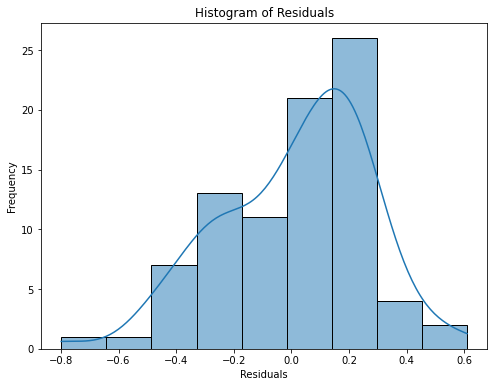

None
Cross-Validation MSE scores: [0.07298665 0.09763012 0.06693144 0.06370323 0.06922401]
Mean MSE: 0.07409509060455752
Standard Deviation of MSE: 0.012150410387544558


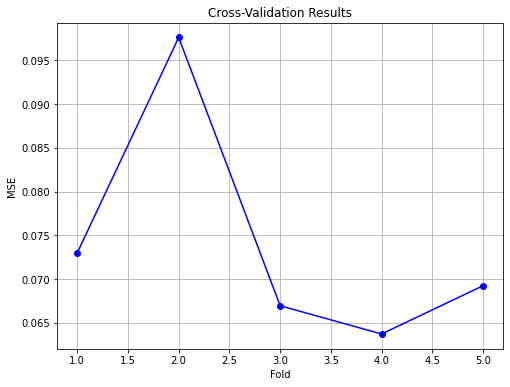

None


In [68]:
step4 = DecisionTreeRegressor(max_depth=8)

step4.fit(X_train,y_train)

y_pred = step4.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print(predict_scatter(step4, y_pred, y_test))
print(residuals_plot(step4, y_pred, y_test))
print(Evaluate_the_model(step4, y_pred, y_test))

### Random Forest

R2 score 0.7011022862950059
MSE 0.06680378718083242
MAE 0.2124421711219747


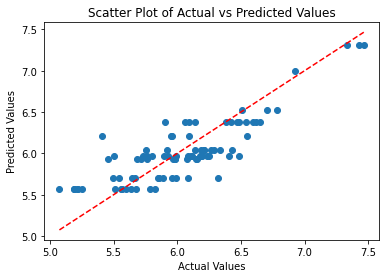

None


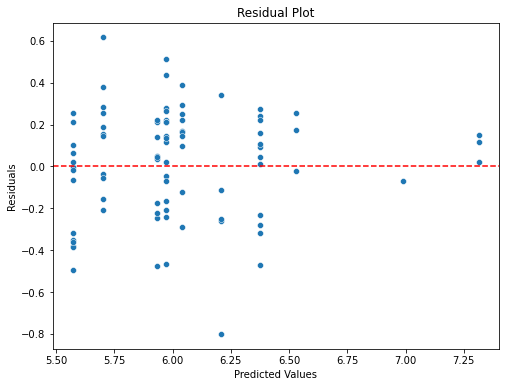

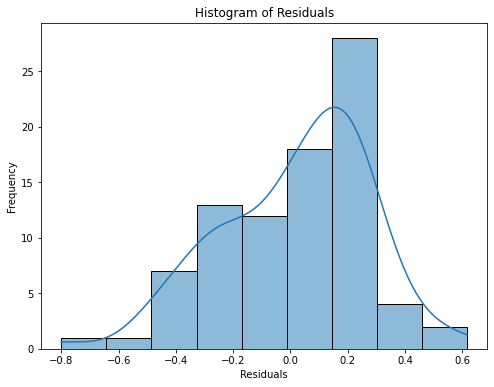

None
Cross-Validation MSE scores: [0.07356376 0.09861246 0.06707532 0.06392906 0.0693399 ]
Mean MSE: 0.07450410233663056
Standard Deviation of MSE: 0.012456198970274964


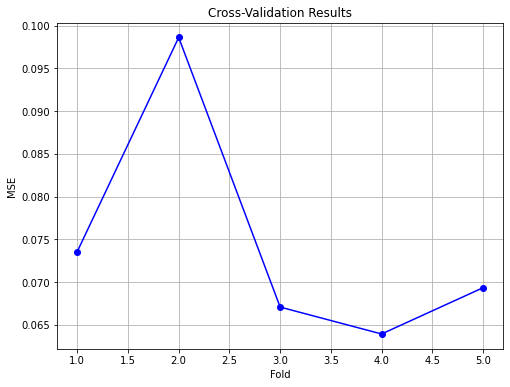

None


In [69]:
step5 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

step5.fit(X_train,y_train)

y_pred = step5.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print(predict_scatter(step5, y_pred, y_test))
print(residuals_plot(step5, y_pred, y_test))
print(Evaluate_the_model(step5, y_pred, y_test))

### Evaluation

In [70]:
models = {
    'Multiple Linear regreesion' : step1,
    'Ridge' : step2,
    'Lasso' : step3,
    'Decision Tree': step4,
    'Random forest' : step5
}

In [71]:
results = {}
kf = KFold(n_splits= 5)

for name, model in models.items():
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv= kf)))
    results[name] = result

In [72]:
for name, result in results.items():
    print(f"{name} : {round(result, 3)}")

Multiple Linear regreesion : 0.275
Ridge : 0.275
Lasso : 0.275
Decision Tree : 0.277
Random forest : 0.277


In [73]:
results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'RMSE'}).sort_values('RMSE', ascending=False)
results_df.T

,Random forest,Decision Tree,Ridge,Lasso,Multiple Linear regreesion
RMSE,0.277045,0.276639,0.275308,0.274814,0.274811


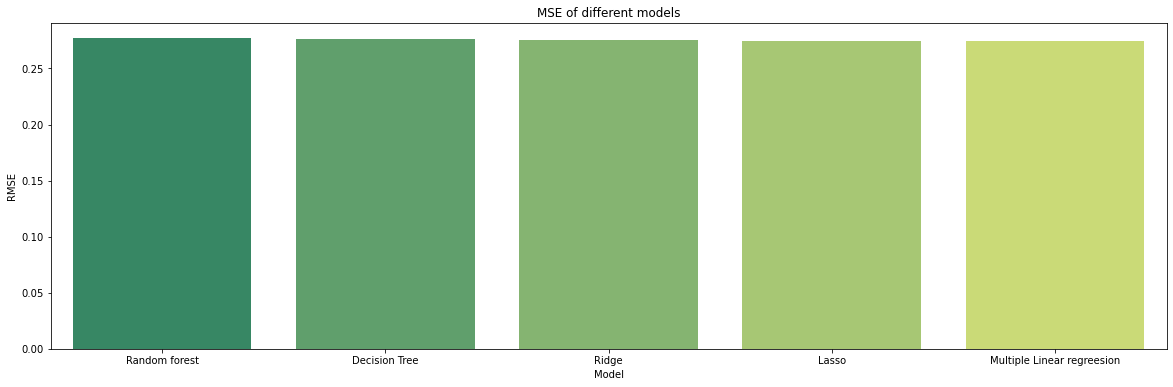

In [74]:
plt.figure(figsize = (20, 6))
sns.barplot(x= results_df.index, y = results_df['RMSE'], palette = 'summer')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('MSE of different models');